### WEB SCRAPING

This stage includes some code to get you started with web scraping. `BeautifulSoup` is used to scrape the data from the SKYTRAX website. Only reviews related to British Airways and the Airline will be collected, here: [https://www.airlinequality.com/airline-reviews/british-airways]. After scraping, the data is converted into a csv file format for cleaning, analysis and model development.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 1000

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    # Prints out the total number of scrapped reviews from the website
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 3000 total reviews
Scraping page 4
   ---> 3648 total reviews
Scraping page 5
   ---> 3648 total reviews
Scraping page 6
   ---> 3648 total reviews
Scraping page 7
   ---> 3648 total reviews
Scraping page 8
   ---> 3648 total reviews
Scraping page 9
   ---> 3648 total reviews
Scraping page 10
   ---> 3648 total reviews
Scraping page 11
   ---> 3648 total reviews
Scraping page 12
   ---> 3648 total reviews
Scraping page 13
   ---> 3648 total reviews
Scraping page 14
   ---> 3648 total reviews
Scraping page 15
   ---> 3648 total reviews
Scraping page 16
   ---> 3648 total reviews
Scraping page 17
   ---> 3648 total reviews
Scraping page 18
   ---> 3648 total reviews
Scraping page 19
   ---> 3648 total reviews
Scraping page 20
   ---> 3648 total reviews
Scraping page 21
   ---> 3648 total reviews
Scraping page 22
   ---> 3648 total reviews
Scraping page 23
   ---> 3648 total revie

In [ ]:
# converting the data to pandas dataframe and assign into variable name called reviews
data = pd.DataFrame()
data["reviews"] = reviews
data.head()

,reviews
0,✅ Trip Verified | My daughter and I were deni...
1,✅ Trip Verified | Despite boarding being the u...
2,"Not Verified | Flight cancelled, no crew! 9th..."
3,"Not Verified | The worst service ever, my bag..."
4,✅ Trip Verified | 4/4 flights we booked this ...


The loops above collected 3648 reviews by iterating through the paginated pages on the website.

#### DATA CLEANING

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3648 non-null   object
dtypes: object(1)
memory usage: 28.6+ KB


In [ ]:
data.describe()

,reviews
count,3648
unique,3646
top,British Airways from Tampa to Gatwick on Boein...
freq,2


In [ ]:
data.head()

,reviews
0,✅ Trip Verified | My daughter and I were deni...
1,✅ Trip Verified | Despite boarding being the u...
2,"Not Verified | Flight cancelled, no crew! 9th..."
3,"Not Verified | The worst service ever, my bag..."
4,✅ Trip Verified | 4/4 flights we booked this ...


#### Checking for NULL values

In [ ]:
data.isnull().sum()

reviews    0
dtype: int64

#### Removing unnecessary texts from all the review entries

In [ ]:
data.reviews= data.reviews.str.split('|',expand=True)[1]
data.head(5)

,reviews
0,My daughter and I were denied boarding on ou...
1,Despite boarding being the usual free for all...
2,"Flight cancelled, no crew! 9th September 202..."
3,"The worst service ever, my baggage did not a..."
4,4/4 flights we booked this holiday were dela...


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [ ]:
def clean_text(text):

    # Remove special characters, punctuation, and numbers using regular expressions
    text = re.sub(r'\d+', '', str(text))  # Remove numbers
    text = re.sub(r'[^\w\s]', '', str(text))  # Remove punctuation and special characters

    return text


In [ ]:
# Cleaning the text in the review column
data['Cleaned Reviews'] = data['reviews'].apply(clean_text)
data.head()

,reviews,Cleaned Reviews
0,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on ou...
1,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...
2,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not p...
3,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not ar...
4,4/4 flights we booked this holiday were dela...,flights we booked this holiday were delayed...


#### The libraries below sets up NLTK for various text processing tasks by downloading necessary data resources (such as tokenization, stopwords, and WordNet) and importing functions and modules needed for text analysis, including tokenization, part-of-speech tagging, and access to stopwords and WordNet resources.

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def further_cleaning(text):

    # Tokenize the text into words
    words = word_tokenize(str(text))

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words (reduce words to their base or root form)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a clean text string
    cleaned_text = ' '.join(words)

    return cleaned_text

In [ ]:
data['Cleaned Text'] = data['Cleaned Reviews'].apply(further_cleaning)
data.head()

,reviews,Cleaned Reviews,Cleaned Text
0,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on ou...,My daughter I denied boarding business class f...
1,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,Despite boarding usual free LHR group called b...
2,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not p...,Flight cancelled crew th September peak holida...
3,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not ar...,The worst service ever baggage arrive time Bot...
4,4/4 flights we booked this holiday were dela...,flights we booked this holiday were delayed...,flight booked holiday delayed hour No wifi ava...


### FINAL ANALYSIS
For this customer review data, further analysis is required to show if reviews are positive, negative or neutral. However, Sentiment analysis is a popular technique for analyzing the sentiment or opinion expressed in text data, such as flight reviews. The choice of the best sentiment analysis method depends on various factors, including the volume of data, the complexity of the analysis, and the specific goals of your analysis.

In [ ]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment for the review text
def vadersentimentanalysis(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Added a VADER sentiment column to the dataframe
data['Sentiment'] = data['Cleaned Text'].apply(vadersentimentanalysis)

# function to analyse
def analyze_sentiment(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Created and added an analysis column to the dataframe to show negative, positive or neutral review
data['Analysis'] = data['Sentiment'].apply(analyze_sentiment)

In [ ]:
data.head()

,reviews,Cleaned Reviews,Cleaned Text,Sentiment,Analysis
0,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on ou...,My daughter I denied boarding business class f...,-0.9623,Negative
1,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,Despite boarding usual free LHR group called b...,0.9652,Positive
2,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not p...,Flight cancelled crew th September peak holida...,-0.8779,Negative
3,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not ar...,The worst service ever baggage arrive time Bot...,-0.8591,Negative
4,4/4 flights we booked this holiday were dela...,flights we booked this holiday were delayed...,flight booked holiday delayed hour No wifi ava...,0.2732,Neutral


In [ ]:
print("The number of sentiment counts are:", "\n", data['Analysis'].value_counts())

The number of sentiment counts are: 
 Neutral     1757
Positive    1041
Negative     850
Name: Analysis, dtype: int64


Text(0.5, 1.0, 'BAR CHART SHOWING THE SENTIMENT ANALYSIS FOR THE CUSTOMER REVIEWS')

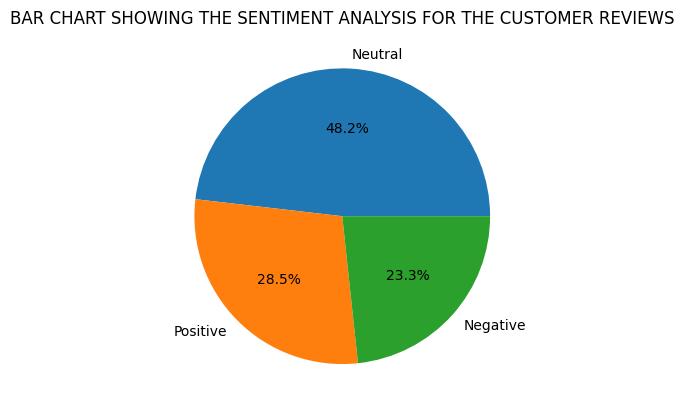

In [ ]:
plt.pie(x = data['Analysis'].value_counts().values, labels = data['Analysis'].value_counts().index, autopct='%1.1f%%', shadow=False)
plt.title("BAR CHART SHOWING THE SENTIMENT ANALYSIS FOR THE CUSTOMER REVIEWS")

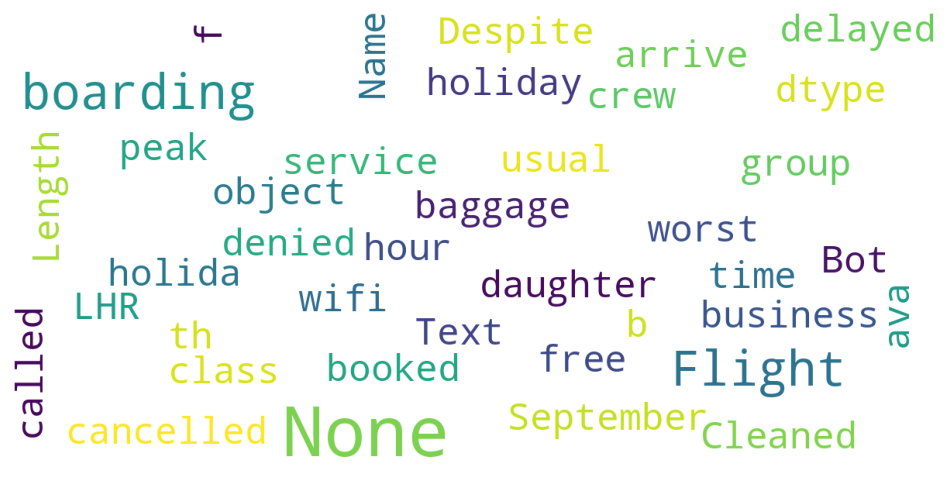

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data["Cleaned Text"])